In [83]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('asteroid-prediction')
jovian.set_colab_id('1P1MeNqsDjAw12a7Jwl6ZFVN9NhVvcO6F')

# Problem Statement
Asteroids are small, rocky objects that orbit the Sun. There are many asteroids in solar system and most of them are located in the main asteroid belt, between the orbits of Mars and Jupiter. The size of asteroids vary vastly with their diameters ranging from a couple of meters to hundreds of kilometers. 
<br>The objective of this project is to predict the diameter of asteroids using various models.

Dataset: https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter

***
![](https://imgur.com/Qg8puRD.jpeg)


We are going to use the following libraries to process, analyze and visualize our data.

In [5]:
!pip install numpy pandas matplotlib seaborn --quiet

The following code will install the required machine learning libraries. The opendatasets library will be used to download the data from kaggle.



In [6]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 166.7 MB 17 kB/s 
     |████████████████████████████████| 2.0 MB 50.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 


## Downloading the Data

In [7]:
import os
import opendatasets as od
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [8]:
od.download('https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshatpatil
Your Kaggle Key: ··········


100%|██████████| 161M/161M [00:01<00:00, 115MB/s]


In [9]:
os.listdir('prediction-of-asteroid-diameter')

['Asteroid.csv', 'Asteroid_Updated.csv']

listdir diplays the files that are present in the directory. We have two file Asteroid.csv and Asteroid_Updated.csv . We will be using Asteroid.csv for our project. 

In [10]:
asteroid_df = pd.read_csv('./prediction-of-asteroid-diameter/Asteroid.csv', low_memory=False)

In [11]:
asteroid_df

,full_name,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.594780
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.233240
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.034540
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.139480
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.850,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.095890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839731,(6344 P-L),2.812945,0.664688,NaN,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,0.032397
839732,(1168 T-2),2.645238,0.259376,NaN,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.956145
839733,(2060 T-2),2.373137,0.202053,NaN,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.893896
839734,(2678 T-3),2.260404,0.258348,NaN,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.680220


The dataset contains 27 columns and 8 Lakh rows.

## Preprocessing and Feature Engineering
Removing redundant data dropping unnecessary columns and rows. Selecting meaningful data.

In [12]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

The goal of the project is to predict the diameter so all the rows that have missing diameter values need to be dropped.

In [13]:
asteroid_df.dropna(subset=['diameter'], inplace=True)

Some columns may have very few entries. pd.info() is used to get an idea of all the null values.

In [14]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137681 entries, 0 to 810411
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       137681 non-null  object 
 1   a               137681 non-null  float64
 2   e               137681 non-null  float64
 3   G               119 non-null     float64
 4   i               137681 non-null  float64
 5   om              137681 non-null  float64
 6   w               137681 non-null  float64
 7   q               137681 non-null  float64
 8   ad              137681 non-null  float64
 9   per_y           137681 non-null  float64
 10  data_arc        137541 non-null  float64
 11  condition_code  137681 non-null  object 
 12  n_obs_used      137681 non-null  int64  
 13  H               136930 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          16 non-null      object 
 16  albedo          136449 non-null  float64
 17  rot_per   

In [15]:
asteroid_df['G'].isna().sum()

137562

We can also use the df.isna() to get a list of boolean values indicating whether the value in the rows are missing or not and then use the sum() function to get the total count. The 'G' column (Gravitation) has 137562 missing values.

In [16]:
asteroid_df['spec_T'].isna().sum()

136716

Similarly 'spec_T' column has 136716 missing values.

In [17]:
asteroid_df.drop(columns=['G','extent','GM','BV','UB','IR','spec_B','spec_T','rot_per'], inplace=True)

The columns which have a large number of missing/nan/null values can be dropped.

In [18]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137681 entries, 0 to 810411
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       137681 non-null  object 
 1   a               137681 non-null  float64
 2   e               137681 non-null  float64
 3   i               137681 non-null  float64
 4   om              137681 non-null  float64
 5   w               137681 non-null  float64
 6   q               137681 non-null  float64
 7   ad              137681 non-null  float64
 8   per_y           137681 non-null  float64
 9   data_arc        137541 non-null  float64
 10  condition_code  137681 non-null  object 
 11  n_obs_used      137681 non-null  int64  
 12  H               136930 non-null  float64
 13  diameter        137681 non-null  object 
 14  albedo          136449 non-null  float64
 15  neo             137681 non-null  object 
 16  pha             137681 non-null  object 
 17  moid      

In [84]:
jovian.commit(project='asteroid-prediction')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sakshatpats/asteroid-prediction


'https://jovian.ai/sakshatpats/asteroid-prediction'

#### Input and Target Columns
For splitting the data into input and target columns, train_test_splitfrom sklearn can be used. 60% of the data is used for training, 20% for validation and 20% for testing.

In [20]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(asteroid_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

'diameter' and 'full_name' cannot be used as inputs and we shall drop them.

In [21]:
input_col = list(asteroid_df.drop(['diameter','full_name'], axis=1).columns.values)

In [22]:
input_col

['a',
 'e',
 'i',
 'om',
 'w',
 'q',
 'ad',
 'per_y',
 'data_arc',
 'condition_code',
 'n_obs_used',
 'H',
 'albedo',
 'neo',
 'pha',
 'moid']

In [23]:
target_col='diameter'

In the below cell we are making a copy for future use.

In [24]:
train_inputs = train_df[input_col].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_col].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_col].copy()
test_targets = test_df[target_col].copy()

#### Numerical and Categorical columns
Identifying the numerical and categorical columns for scaling and one hot encoding.




In [25]:
numeric_cols = train_inputs.select_dtypes('number').columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()[1:]

In [26]:
categorical_cols

['neo', 'pha']

In [27]:
numeric_cols

['a',
 'e',
 'i',
 'om',
 'w',
 'q',
 'ad',
 'per_y',
 'data_arc',
 'n_obs_used',
 'H',
 'albedo',
 'moid']

#### Imputing Missing Values
Missing values are imputed using SimpleImputer from scikit-learn.

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

In [29]:
imputer.fit(asteroid_df[['data_arc','H','albedo']])# fitting the data to the imputer

SimpleImputer()

In [30]:
train_inputs[['data_arc','H','albedo']] = imputer.transform(train_inputs[['albedo','H','data_arc']])
val_inputs[['data_arc','H','albedo']] = imputer.transform(val_inputs[['albedo','H','data_arc']])
test_inputs[['data_arc','H','albedo']] = imputer.transform(test_inputs[['albedo','H','data_arc']])

In [31]:
train_inputs.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
albedo            0
neo               0
pha               0
moid              0
dtype: int64

As shown, all missing values are imputed.

#### Scale Numeric Values
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is done using MinMaxScaler from scikit-learn.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
scaler.fit(asteroid_df[numeric_cols])

MinMaxScaler()

In [35]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

#### Encode Categorical Columns
Categorical variables need to be converted into a form that can be provided to models to do a better job in prediction. One hot encoding is used in this project.

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [37]:
encoder.fit(asteroid_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [38]:
encoder.categories_

[array(['N', 'Y'], dtype=object), array(['N', 'Y'], dtype=object)]

In [39]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [40]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

## Model 1: Random Forests

A random forest is a model used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. A random forest algorithm consists of many decision trees.

We shall use RandomForestRegressor from scikit-learn. Let's begin by identifying the input columns.

In [41]:
train_inputs[numeric_cols + encoded_cols]

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,neo_N,neo_Y,pha_N,pha_Y
89153,0.005599,0.030140,0.003417,0.178098,0.087967,0.065250,0.002445,0.000546,-0.000013,0.043884,0.479401,9317.316316,0.043882,1.0,0.0,1.0,0.0
147802,0.006383,0.199592,0.010448,0.162343,0.781839,0.059749,0.003524,0.000649,-0.000013,0.033798,0.468165,6710.709710,0.037611,1.0,0.0,1.0,0.0
471459,0.006628,0.233484,0.080491,0.634999,0.122727,0.058998,0.003810,0.000682,-0.000013,0.008155,0.490637,2767.766767,0.037186,1.0,0.0,1.0,0.0
241205,0.005506,0.093919,0.062855,0.648423,0.405939,0.060086,0.002622,0.000534,-0.000013,0.019528,0.479401,6084.083083,0.038450,1.0,0.0,1.0,0.0
227462,0.005027,0.148366,0.075401,0.702331,0.519842,0.052488,0.002538,0.000475,-0.000010,0.043455,0.471910,6805.804805,0.030812,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167103,0.004505,0.142965,0.009076,0.644645,0.358023,0.048511,0.002220,0.000413,-0.000013,0.062876,0.490637,6590.589590,0.026255,1.0,0.0,1.0,0.0
54546,0.007111,0.034304,0.085301,0.906950,0.167325,0.079022,0.003248,0.000748,-0.000013,0.057082,0.408240,8274.273273,0.058069,1.0,0.0,1.0,0.0
256438,0.005266,0.261478,0.051389,0.191048,0.070235,0.047088,0.003062,0.000505,-0.000012,0.023391,0.494382,6147.146146,0.025408,1.0,0.0,1.0,0.0
136316,0.004609,0.282950,0.032563,0.636678,0.366948,0.041133,0.002712,0.000425,-0.000008,0.052468,0.475655,8498.497497,0.018871,1.0,0.0,1.0,0.0


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

The above code defines the model, n_jobs=-1 is used to max out the processor capacity and random_state = 42 selects a particular set of rows so that the results do not vary each time the model is fitted.

The code in the next cell is used to fit the data to the model.

In [44]:
rf.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

The score() method will return a metric ranging from 0 to 1 giving an idea about the loss occured. The  closer to 1 the better the model but increasing the training score may result in a decrease in the validation score due to overfitting. 

In [45]:
rf.score(train_inputs[numeric_cols + encoded_cols], train_targets) 

0.9882750878257214

In [46]:
rf.score(test_inputs[numeric_cols + encoded_cols], test_targets)

0.9159834899697051

In [47]:
rf.score(val_inputs[numeric_cols + encoded_cols], val_targets)

0.9782974485803546

We get a score of 98.8% for the training dataset, 91.6% for the test dataset and 97.8% for the validation dataset.

We shall now define a function to calculate the root mean squared error of the predicted results and targets.

In [48]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [49]:
train_preds = rf.predict(train_inputs[numeric_cols + encoded_cols])

In [50]:
rmse(train_preds, train_targets)

1.0211512135610912

It appears that the rmse error for the training data is 1.02 units.

In [51]:
val_preds = rf.predict(val_inputs[numeric_cols + encoded_cols])

In [52]:
rmse(val_preds, val_targets)

1.2721831761235065

Similarly the validation rmse is 1.27 units.

### Hyperparameter Tuning and Regularization
The model that we are using comes with some predefined hyperparameter values. These predefined parameter values can be overfitted or not selected to the optimum. Hence we can set our own hyperparameter values for the model to decrease the rmse further. 

A function is defined in the next steps to avoid defining and fitting the model manually repetitively.

In [53]:
def test_param(**params):
    test_rf = RandomForestRegressor(n_jobs=-1, random_state=42, **params)
    test_rf.fit(train_inputs[numeric_cols + encoded_cols], train_targets)
    train_rmse = rmse(test_rf.predict(train_inputs[numeric_cols + encoded_cols]), train_targets)
    val_rmse = rmse(test_rf.predict(val_inputs[numeric_cols + encoded_cols]), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

n_estimators is the number of trees in the model. The default value is 100.

In [54]:
test_param(n_estimators=120)

Train RMSE: 0.9234045512670046, Validation RMSE: 1.2709547351147126


max_depth decides the depth of the tree. The deeper the tree, more the number of branches it has.

In [55]:
test_param(n_estimators=120, max_depth=50)

Train RMSE: 0.9234058623380091, Validation RMSE: 1.270953048407198


## Model 2: XGBoost
The other model used is XGBoost. XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.

In [56]:
train_inputs[numeric_cols + encoded_cols]

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,neo_N,neo_Y,pha_N,pha_Y
89153,0.005599,0.030140,0.003417,0.178098,0.087967,0.065250,0.002445,0.000546,-0.000013,0.043884,0.479401,9317.316316,0.043882,1.0,0.0,1.0,0.0
147802,0.006383,0.199592,0.010448,0.162343,0.781839,0.059749,0.003524,0.000649,-0.000013,0.033798,0.468165,6710.709710,0.037611,1.0,0.0,1.0,0.0
471459,0.006628,0.233484,0.080491,0.634999,0.122727,0.058998,0.003810,0.000682,-0.000013,0.008155,0.490637,2767.766767,0.037186,1.0,0.0,1.0,0.0
241205,0.005506,0.093919,0.062855,0.648423,0.405939,0.060086,0.002622,0.000534,-0.000013,0.019528,0.479401,6084.083083,0.038450,1.0,0.0,1.0,0.0
227462,0.005027,0.148366,0.075401,0.702331,0.519842,0.052488,0.002538,0.000475,-0.000010,0.043455,0.471910,6805.804805,0.030812,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167103,0.004505,0.142965,0.009076,0.644645,0.358023,0.048511,0.002220,0.000413,-0.000013,0.062876,0.490637,6590.589590,0.026255,1.0,0.0,1.0,0.0
54546,0.007111,0.034304,0.085301,0.906950,0.167325,0.079022,0.003248,0.000748,-0.000013,0.057082,0.408240,8274.273273,0.058069,1.0,0.0,1.0,0.0
256438,0.005266,0.261478,0.051389,0.191048,0.070235,0.047088,0.003062,0.000505,-0.000012,0.023391,0.494382,6147.146146,0.025408,1.0,0.0,1.0,0.0
136316,0.004609,0.282950,0.032563,0.636678,0.366948,0.041133,0.002712,0.000425,-0.000008,0.052468,0.475655,8498.497497,0.018871,1.0,0.0,1.0,0.0


The implementation of the model is similar to the random forests model done previously.

In [57]:
from xgboost import XGBRegressor

In [58]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=40, max_depth=6)

In [59]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=40, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
model.score(train_inputs[numeric_cols + encoded_cols], train_targets) 

0.995257218956483

With XGBoost, we get a score of 99.5% for the training dataset.

In [61]:
model.score(test_inputs[numeric_cols + encoded_cols], test_targets) 

0.9113430326644758

The score for the test dataset is 91.1%

In [62]:
model.score(val_inputs[numeric_cols + encoded_cols], val_targets) 

0.9754576533580783

And the validation score is 97.5%.

In [63]:
preds = model.predict(val_inputs[numeric_cols + encoded_cols])

In [64]:
rmse(preds, val_targets)

1.3528582487517848

The root mean square error is 1.35 units.

### Hyperparameter Tuning and Regularization
The rmse error that we got for XGBoost seems to be more than that for Random Forests. The reason fo this might be because the default hyperparameters could be causing the model to overfit. 

In [65]:
def test_params(**params):
    test_params_model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    test_params_model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)
    train_rmse = rmse(test_params_model.predict(train_inputs[numeric_cols + encoded_cols]), train_targets)
    val_rmse = rmse(test_params_model.predict(val_inputs[numeric_cols + encoded_cols]), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [66]:
test_params(n_estimators=10)

Train RMSE: 1.1296840910743067, Validation RMSE: 1.4855084387720234


In [67]:
test_params(n_estimators=60)

Train RMSE: 0.5856458293870833, Validation RMSE: 1.3420726932191713


In [68]:
test_params(n_estimators=60,max_depth=6)

Train RMSE: 0.5856458293870833, Validation RMSE: 1.3420726932191713


In [69]:
test_params(n_estimators=60,max_depth=4)

Train RMSE: 0.7630552512953918, Validation RMSE: 1.400120772073194


In [70]:
test_params(n_estimators=60,max_depth=6,learning_rate=0.28)

Train RMSE: 0.5916289127571394, Validation RMSE: 1.3201569995771643


In [71]:
test_params(n_estimators=60,max_depth=6,learning_rate=0.275) 

Train RMSE: 0.5939672514207308, Validation RMSE: 1.2582054842625998


By changing the n_estimators, max_depth and learning_rate parameters we have reduced the rmse error.

In [72]:
test_params(n_estimators=100,max_depth=6,learning_rate=0.275)

Train RMSE: 0.5239645871519669, Validation RMSE: 1.2574682880050911


## Putting it Together and Making Predictions
We will now be making sample prediction using the best model obtained.

In [73]:
final_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=6, learning_rate=0.275)

In [74]:
final_model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.275, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
def predict_input(model, single_input): #Defining a function to predict values.
    sample_input_df = pd.DataFrame([single_input])
    #sample_input_df[numeric_cols] = imputer.transform(sample_input_df[numeric_cols])
    sample_input_df[numeric_cols] = scaler.transform(sample_input_df[numeric_cols])
    sample_input_df[encoded_cols] = encoder.transform(sample_input_df[categorical_cols].values)
    return model.predict(sample_input_df[numeric_cols + encoded_cols])[0]

Selecting sample input values from the dataset to make predictions.

In [76]:
sample_input1 = { 'a': 2.76917, 'e': 0.076009, 'i': 10.5941, 'om': 80.3055, 'w': 73.5977, 'q': 2.55868, 'ad': 2.97965, 'per_y': 4.6082, 'data_arc': 8822, 'n_obs_used': 1002, 'H': 3.34, 'albedo': 0.09, 'neo': 'N', 'pha': 'N', 'moid': 1.59478}
sample_input1

{'H': 3.34,
 'a': 2.76917,
 'ad': 2.97965,
 'albedo': 0.09,
 'data_arc': 8822,
 'e': 0.076009,
 'i': 10.5941,
 'moid': 1.59478,
 'n_obs_used': 1002,
 'neo': 'N',
 'om': 80.3055,
 'per_y': 4.6082,
 'pha': 'N',
 'q': 2.55868,
 'w': 73.5977}

In [77]:
predicted_diameter = predict_input(final_model, sample_input1)
predicted_diameter

475.83835

In [78]:
sample_input2 = { 'a': 	2.77247, 'e': 	0.230337, 'i': 34.8362, 'om': 173.08, 'w': 310.049, 'q': 2.13386, 'ad': 3.41107, 'per_y': 4.61644, 'data_arc': 72318, 'n_obs_used': 8490, 'H': 4.13, 'albedo': 0.101, 'neo': 'N', 'pha': 'N', 'moid': 1.23324}
sample_input2

{'H': 4.13,
 'a': 2.77247,
 'ad': 3.41107,
 'albedo': 0.101,
 'data_arc': 72318,
 'e': 0.230337,
 'i': 34.8362,
 'moid': 1.23324,
 'n_obs_used': 8490,
 'neo': 'N',
 'om': 173.08,
 'per_y': 4.61644,
 'pha': 'N',
 'q': 2.13386,
 'w': 310.049}

In [79]:
predicted_diameter = predict_input(final_model, sample_input2)
predicted_diameter

525.1071

Thus the predicted diameter for the first and second sample inputs is 475.83 metres and 525.1 metres respectively.

In [80]:
print(final_model.feature_importances_)

[3.9988649e-03 3.1931896e-03 6.7521416e-04 1.8536733e-03 1.1207637e-03
 8.8873066e-02 2.0428903e-03 0.0000000e+00 6.8833821e-02 1.3945224e-03
 8.2537103e-01 1.3099452e-03 1.3329788e-03 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


Finally we'll print and plot the important features from the model.

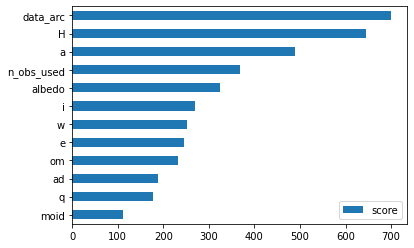

In [81]:
feature_important = final_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh')

In [86]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sakshatpats/asteroid-prediction


'https://jovian.ai/sakshatpats/asteroid-prediction'